https://github.com/ashleylizg/nlp-tutorial/blob/main/main.ipynb

used for reference

In [ ]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
#% matplotlib inline

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
#% matplotlib inline

In [ ]:
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import time

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
%cd '/content/drive/MyDrive/Colab Notebooks/AmazonPantsData_Medium'

# Load Amazon reviews from CSV
start = time.time()
#girl_pants = pd.read_csv('med_girl_pant.csv')
boy_pants = pd.read_csv('med_boy_pant.csv')

/content/drive/MyDrive/Colab Notebooks/AmazonPantsData_Medium


In [ ]:
import string
import nltk
from nltk.tokenize import WhitespaceTokenizer
from nltk.corpus import stopwords
from nltk import classify
from nltk import NaiveBayesClassifier

In [ ]:

len(boy_pants.index)

16988

In [ ]:
boy_pants.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'marketplace', 'customer_id', 'review_id',
       'product_id', 'product_parent', 'product_title', 'product_category',
       'star_rating', 'helpful_votes', 'total_votes', 'vine',
       'verified_purchase', 'review_headline', 'review_body', 'review_date'],
      dtype='object')

In [ ]:
#creating a new DF with just important information
boy_pants_df = boy_pants[['product_title','star_rating', 'review_headline', 'review_body']].copy()

# Hypothesis

From the distribution of Star Ratings for Pants by Gender in the graphs above, we can see that Women's Pants have more Low Reviews (Rating 1) compared to Men's Pants. We want to find out WHY?

It is also interesting that Pants without Gender in the Product Title have more High Star Ratings and less Low Star Ratings than pants made for Women or Men.

Women's Pants tend to focus on body-hugging, which is where issues can arise as shape is very much individual, while No Gender Pants and Men Pants are less likely to focus on exact fit.

In [ ]:
#The score category ranges from 1-5
#1 and 2 will be assigned as negative reviews
#4 and 5 will be assigned as positive reviews,
#3 will be omitted

pos_reviews = boy_pants_df.loc[boy_pants_df['star_rating'] > 3]
neg_reviews = boy_pants_df.loc[boy_pants_df['star_rating'] < 3]

#inserting a column into dataframe for labeling, so boolean mask can filter more easily later
pos_reviews.insert(0,'Rating','High')
neg_reviews.insert(0,'Rating','Low')

#combining into a single dataframe
posneg_reviews = pd.concat([pos_reviews,neg_reviews], ignore_index=True)
posneg_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14923 entries, 0 to 14922
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Rating           14923 non-null  object
 1   product_title    14923 non-null  object
 2   star_rating      14923 non-null  int64 
 3   review_headline  14922 non-null  object
 4   review_body      14922 non-null  object
dtypes: int64(1), object(4)
memory usage: 583.1+ KB


In [ ]:
#pos_reviews.head()

#checking for nulls in No Gender Pants reviews
posneg_reviews['review_body'].isnull().sum()

# reviews = = posneg_reviews[posneg_reviews['review_body'].notna()]
# posneg_reviews.head()
posneg_reviews['Rating'].value_counts()

High    11812
Low      3111
Name: Rating, dtype: int64

In [ ]:
pos_df = posneg_reviews.loc[posneg_reviews['Rating']== 'High']
pos_list = pos_df['review_body'].tolist()

neg_df = posneg_reviews.loc[posneg_reviews['Rating']== 'Low']
neg_list = neg_df['review_body'].tolist()

# looking at first 5 reviews
pos_list[:5]
neg_list[:5]

['fair',
 'Pant was low rise in seat which is not a good fit for me. Should differentiate between slim cut pants and big and tall size which I needed.  I returned the pants.',
 'I just bought this pant 2 weeks ago and i didnt wear it alot it got broken already. and the size of this pant is very wired i have to stich it before i first wear. waist is away too. all i can say is a waste of money.',
 'the pants are nice and comfy but they had a big rip in them when i got them and i was very dissapointed',
 'Awful. Sizing was way off. Returned']

Cleaning and Pre-Processing

In [ ]:
pos_list_str = [str(i) for i in pos_list]
neg_list_str = [str(i) for i in neg_list]

# lowercase
pos_list_lowered = [word.lower() for word in pos_list_str]
neg_list_lowered = [word.lower() for word in neg_list_str]

pos_list_lowered[:1]
#neg_list_lowered[:1]

['i love it, now i need to buy more but in different colors.']

In [1]:
# "bag of words" to divide indicator words for classifier, to train classifer
# turn list into string
# using list comprehension

pos_list_to_string = ' '.join([str(elem) for elem in pos_list_lowered])
neg_list_to_string = ' '.join([str(elem) for elem in neg_list_lowered])

#pos_list_to_string

NameError: name 'pos_list_lowered' is not defined

In [ ]:
# NLTK list of stop words and punctuation in English, in "stop"
nltk.download('stopwords')
stop = set(stopwords.words('english') + list(string.punctuation))

# NLTK WhiteSpace Tokenizer to tokenize data, splits and remove whitespace
tokenizer = WhitespaceTokenizer()

filtered_pos_list = [w for w in tokenizer.tokenize(pos_list_to_string) if w not in stop]
filtered_neg_list = [w for w in tokenizer.tokenize(neg_list_to_string) if w not in stop]

#filtered_pos_list[:10]
# still has periods
# using RegEx to remove periods

filtered_pos_list2 = [w.strip(string.punctuation) for w in filtered_pos_list]
filtered_neg_list2 = [w.strip(string.punctuation) for w in filtered_neg_list]

filtered_pos_list2[:10]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['love',
 'it',
 'need',
 'buy',
 'different',
 'colors',
 'bought',
 'present',
 'mother',
 'happy']

In [ ]:
# NLTK Frequency Distribution to preview most common words in each list
# there may be synonyms

fd_pos = nltk.FreqDist(filtered_pos_list2)
fd_neg = nltk.FreqDist(filtered_neg_list2)

#fd_pos.most_common(15)
fd_neg.most_common(15)

[('pants', 1417),
 ('fit', 819),
 ('size', 799),
 ('small', 760),
 ('like', 742),
 ('ordered', 435),
 ('would', 432),
 ('waist', 428),
 ('way', 406),
 ('material', 386),
 ('pair', 337),
 ('one', 335),
 ('quality', 330),
 ('wear', 326),
 ('good', 313)]

In [ ]:
#we will use this frequency list later in a word cloud

In [ ]:
# convert lists to feature sets as a dictionary

def word_features(words):
    return dict([(word, True) for word in words.split()])

# two sets of word features
# combine into one set for training and testing

positive_features = [(word_features(f), 'pos') for f in filtered_pos_list2]

negative_features = [(word_features(f), 'neg') for f in filtered_neg_list2]

labeledwords = positive_features + negative_features

print(negative_features[5])

({'good': True}, 'neg')


In [ ]:
#labeledwords

In [ ]:
type(negative_features)
# list type
len(positive_features)
#len(negative_features)

189487

## Training and Testing

In [ ]:
# randomly shuffled labled words (combined dictionary of positive/negative feature dict)
import random
random.shuffle(labeledwords)

# create train and test set
train_set, test_set = train_test_split(labeledwords, test_size=0.2, random_state=25)
classifier = nltk.NaiveBayesClassifier.train(train_set)

In [ ]:
# test classifier with examples

#neg
print(classifier.classify(word_features('I do not like this pants because they are ugly')))

#pos
print(classifier.classify(word_features('These pants fit well')))

neg
pos


In [ ]:
#calculate accuracy of classifer
# accuracy calculated dividing number of
# correct predictions made by a model divided by the total number of predictions made
# training set has POSITIVE or NEGATIVE tags, classified with labels

print(nltk.classify.accuracy(classifier, test_set))
#test_set

0.7761008087574545


In [ ]:
# shows how likely feature leads to High/Positive or Low/Negative review classification
# Output is a list

# from NLTK’s most informative features of text classifer for the Naïve Bayes Classifier:

classifier.show_most_informative_features(150)

Most Informative Features
                    poor = True              neg : pos    =     44.7 : 1.0
                   worse = True              neg : pos    =     37.8 : 1.0
                terrible = True              neg : pos    =     36.3 : 1.0
                  emptor = True              neg : pos    =     33.2 : 1.0
                 garbage = True              neg : pos    =     26.4 : 1.0
                   loves = True              pos : neg    =     22.5 : 1.0
                   worst = True              neg : pos    =     21.0 : 1.0
                horrible = True              neg : pos    =     18.2 : 1.0
                  ripped = True              neg : pos    =     17.6 : 1.0
                  caveat = True              neg : pos    =     17.2 : 1.0
                children = True              neg : pos    =     17.2 : 1.0
                  sticks = True              neg : pos    =     17.2 : 1.0
                    suck = True              neg : pos    =     17.2 : 1.0

In [ ]:
#looking at frequency count again

pos_common = [i[0] for i in fd_pos.most_common(50)]

#pos_common

In [ ]:
neg_common = [i[0] for i in fd_neg.most_common(50)]

#neg_common

In [ ]:
set(pos_common).intersection(neg_common)

{'bought',
 'br',
 'buy',
 'fabric',
 'fit',
 'get',
 'good',
 'got',
 'great',
 "i'm",
 'it',
 'length',
 'like',
 'long',
 'look',
 'made',
 'material',
 'much',
 'nice',
 'one',
 'order',
 'ordered',
 'pair',
 'pants',
 'pockets',
 'product',
 'quality',
 'really',
 'size',
 'small',
 'them',
 'time',
 'waist',
 'wear',
 'well',
 'would'}

#**Results**

*   List item
*   List item



For Men's Pants, these are words associated with

negative/low reviews:

*  ripped
*   poor
*   cheaply
*   torn
*   weak
*   backside
*   shoddy
*   sagging

and high reviews:

*   comfy
*   stylish
*   weather
*   friends
*   lightweight

The set of the list of most common words also shows what is most important overall.


 * 'fabric',
 * 'fit',
 * 'length',
 * 'long',
 * 'made',
 * 'material',
 * 'quality',
 * 'waist',
 * 'wear',
 *  'well',


In [ ]:
!pip install wordcloud

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pos_alltext = " ".join(review for review in filtered_pos_list2)
neg_alltext = " ".join(review for review in filtered_neg_list2)

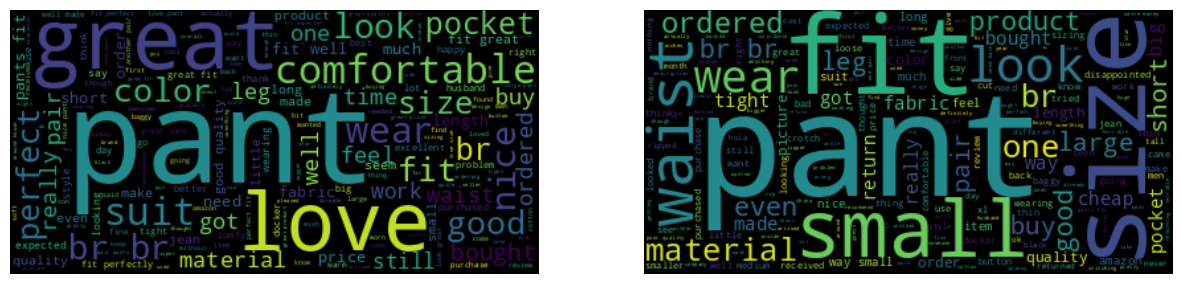

In [ ]:
# Create and generate a word cloud image:
pos_wordcloud = WordCloud().generate(pos_alltext)
neg_wordcloud = WordCloud().generate(neg_alltext)

# Display the generated image:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,10))

plt.subplot(1, 2, 1)
plt.imshow(pos_wordcloud, interpolation='bilinear')
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(neg_wordcloud, interpolation='bilinear')
plt.axis("off")

plt.show()
#plt.tight_layout()


From the word cloud, these words came up frequently for both positive and negative reviews:

*  material
*  fabric

in the word cloud for positive / high reviews

* comfortable
* color
* pocket
* suit

Of course, men's pants would have the word "pocket" in the review... confirming the discussion around the lack of pockets in women's pants.